## Импорт библиотек

In [2]:
import pandas as pd
import sqlite3

## Соединение с базой данных

In [3]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

## Запрос к базе данных

In [4]:
query = 'SELECT uid, timestamp FROM checker WHERE uid LIKE "user_%"'
checker = pd.read_sql(query, connection)
checker

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


## Датафрейм и график

In [5]:
checker['timestamp'] = pd.to_datetime(checker['timestamp'])
checker['hour'] = checker['timestamp'].dt.hour
checker['day'] = checker['timestamp'].dt.day
checker['week_day'] = checker['timestamp'].dt.weekday
checker['type'] = checker['week_day'].apply(lambda x: 'weekday' if x < 5 else 'weekend')
del checker['week_day']
del checker['timestamp']
checker

,uid,hour,day,type
0,user_4,5,17,weekday
1,user_4,5,17,weekday
2,user_4,5,17,weekday
3,user_4,5,17,weekday
4,user_4,5,17,weekday
...,...,...,...,...
3202,user_1,20,21,weekday
3203,user_1,20,21,weekday
3204,user_1,20,21,weekday
3205,user_1,20,21,weekday


In [6]:
commits = checker.groupby(['type', 'day', 'hour']).count()
commits = commits.groupby(['type', 'hour']).mean().reset_index()
commits

,type,hour,uid
0,weekday,0,3.000000
1,weekday,3,2.000000
2,weekday,5,7.500000
3,weekday,6,1.500000
4,weekday,7,5.166667
5,weekday,8,3.700000
6,weekday,9,6.000000
7,weekday,10,13.200000
8,weekday,11,6.769231
9,weekday,12,7.181818


In [7]:
pvt = pd.pivot(commits, values='uid', index='hour', columns='type')
pvt.fillna(0)

type,weekday,weekend
hour,,
0,3.000000,2.000000
1,0.000000,6.000000
3,2.000000,1.000000
5,7.500000,2.000000
6,1.500000,0.000000
7,5.166667,4.000000
8,3.700000,7.000000
9,6.000000,3.666667
10,13.200000,7.000000


array([<Axes: title={'center': 'weekday'}, xlabel='hour'>,
       <Axes: title={'center': 'weekend'}, xlabel='hour'>], dtype=object)

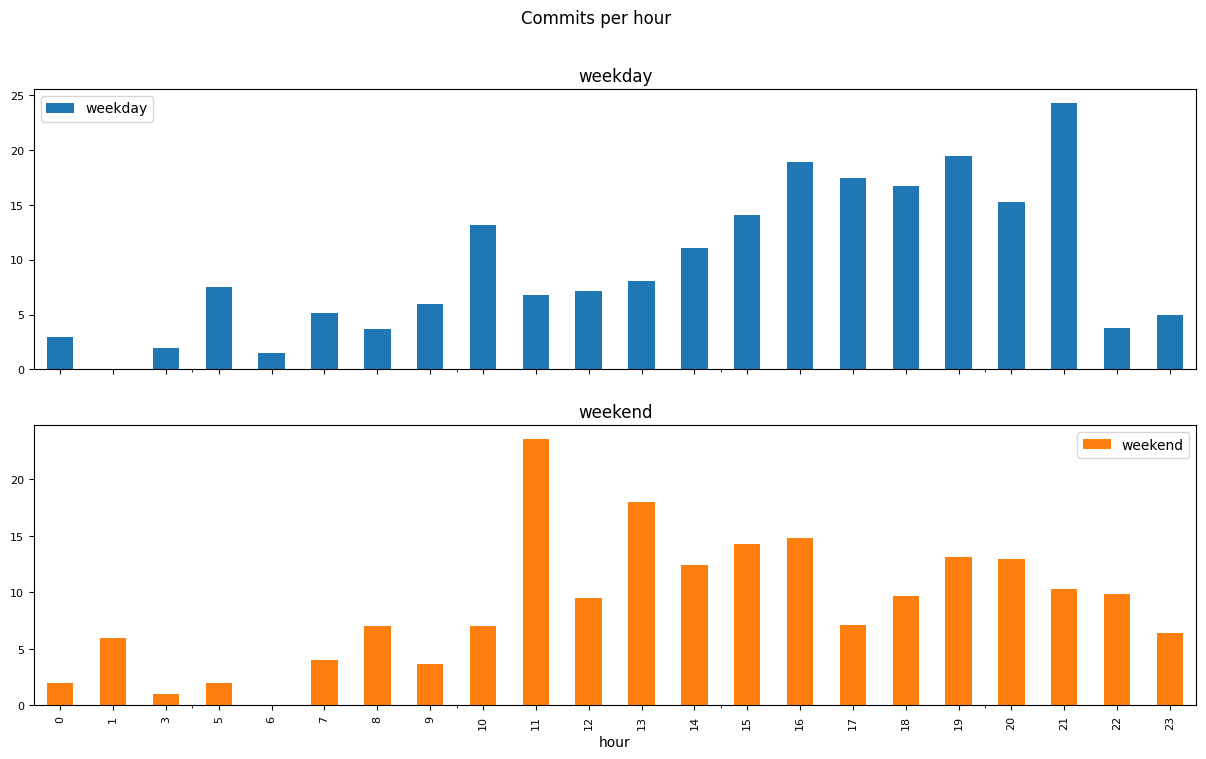

In [8]:
pvt.plot(kind='bar', title='Commits per hour', xlabel='hour', figsize=(15,8), legend=True, fontsize=8, subplots=True)

## Закрытие соединения с БД

In [9]:
connection.close()

## Отличается ли динамика в рабочие и выходные дни?

### Да

In [10]:
pvt[pvt['weekday'] == pvt['weekday'].max()]

type,weekday,weekend
hour,,
21,24.333333,10.285714


In [11]:
pvt[pvt['weekend'] == pvt['weekend'].max()]

type,weekday,weekend
hour,,
11,6.769231,23.6
